In [1]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)

In [2]:
df_US= df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

C:\Users\user\AppData\Local\Temp\ipykernel_33696\3862366179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US['job_posted_month'] = df_US['job_posted_date'].dt.month


Text(0.5, 1.0, 'Top 10 Skills for Data Analyst Jobs in the US Over Time')

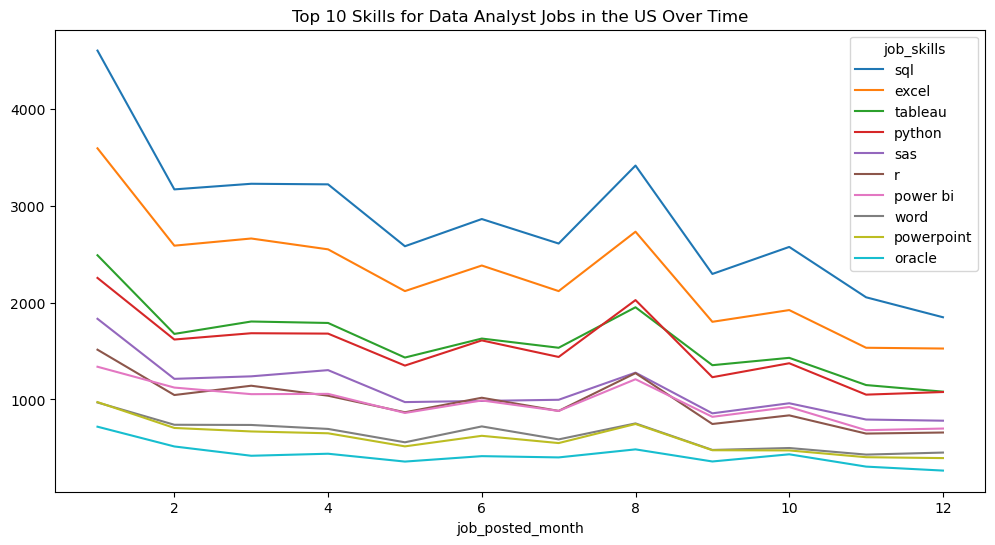

In [3]:
df_US['job_posted_month'] = df_US['job_posted_date'].dt.month
df_US_skills_counts = df_US.explode('job_skills').groupby(['job_posted_month', 'job_skills']).size().reset_index(name='skills_count')
df_US_skills_counts_pivot = df_US_skills_counts.pivot(index='job_posted_month', columns='job_skills', values='skills_count').fillna(0)
df_US_skills_counts_pivot['Total'] = df_US_skills_counts_pivot.sum()
top_skills_US = df_US_skills_counts_pivot.drop(columns=['Total']).sum().sort_values(ascending=False).head(10).index.tolist()
df_US_top_skills = df_US_skills_counts_pivot[top_skills_US]
df_US_top_skills.plot(kind='line', figsize=(12, 6))
plt.title('Top 10 Skills for Data Analyst Jobs in the US Over Time')

In [4]:
DA_totals = df_US.groupby('job_posted_month').size()
df_US_top_skills_percentage = df_US_top_skills.div(DA_totals, axis=0) * 100


In [5]:
df_US_top_skills_percentage= df_US_top_skills_percentage.reset_index()
df_US_top_skills_percentage['job_posted_month_n'] = df_US_top_skills_percentage['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_US_top_skills_percentage= df_US_top_skills_percentage.set_index('job_posted_month_n')
df_US_top_skills_percentage= df_US_top_skills_percentage.drop(columns=['job_posted_month'])

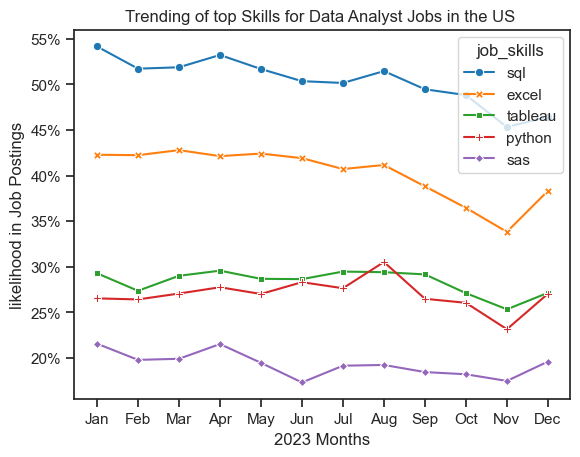

In [19]:
df_DA_plot= df_US_top_skills_percentage.iloc[:, :5]
sns.lineplot(data=df_DA_plot , markers=True, dashes=False, palette="tab10")
sns.set_theme(style="ticks")
plt.ylabel('likelihood in Job Postings')
plt.xlabel('2023 Months')
plt.title('Trending of top Skills for Data Analyst Jobs in the US ')

from matplotlib.ticker import PercentFormatter
ax= plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))


plt.show()